# _**Project - Airbnb in New York**_

## _**Presented by: Sofi Molochny & Itay Asor**_

#### 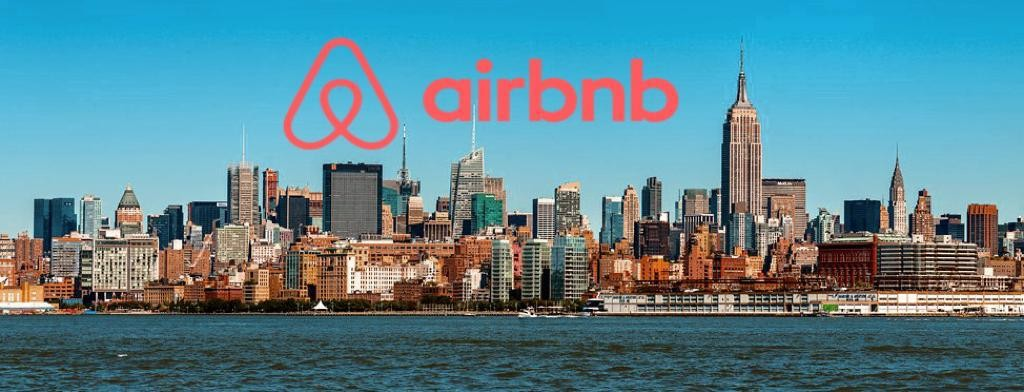 Link to our data : https://github.com/sofimolo/project2024/blob/main/new_york_listings_2024.csv

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns

In [84]:
MY_DATA_URL = "https://raw.githubusercontent.com/sofimolo/project2024/main/new_york_listings_2024.csv"
df = pd.read_csv(MY_DATA_URL, index_col=0)

#### _**Our data information:**_

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20758 entries, 1312228 to 566029911248687183
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            20758 non-null  object 
 1   host_id                         20758 non-null  int64  
 2   host_name                       20758 non-null  object 
 3   neighbourhood_group             20758 non-null  object 
 4   neighbourhood                   20758 non-null  object 
 5   latitude                        20758 non-null  float64
 6   longitude                       20758 non-null  float64
 7   room_type                       20758 non-null  object 
 8   price                           20758 non-null  float64
 9   minimum_nights                  20758 non-null  int64  
 10  number_of_reviews               20758 non-null  int64  
 11  last_review                     20758 non-null  object 
 12  reviews_per_m

#### _**Our columns names-**_

In [86]:
df.columns

Index(['name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'license', 'rating', 'bedrooms', 'beds',
       'baths'],
      dtype='object')

In [87]:
df.shape

(20758, 21)

In [88]:
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,beds
count,2.075800e+04,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,1.749316e+08,40.726798,-73.939161,187.776616,28.558435,42.642596,1.257910,18.844108,205.990317,10.852105,1.723721
std,1.725541e+08,0.060294,0.061403,1022.797208,33.536518,73.561654,1.904661,70.910834,135.087768,21.357071,1.212272
min,1.678000e+03,40.500314,-74.249840,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000,1.000000
25%,2.041738e+07,40.684150,-73.980710,80.000000,30.000000,4.000000,0.210000,1.000000,87.000000,1.000000,1.000000
50%,1.087271e+08,40.722820,-73.949587,125.000000,30.000000,14.000000,0.650000,2.000000,215.000000,3.000000,1.000000
75%,3.144102e+08,40.763098,-73.917460,199.000000,30.000000,49.000000,1.800000,5.000000,353.000000,15.000000,2.000000
max,5.504035e+08,40.911147,-73.713650,100000.000000,1250.000000,1865.000000,75.490000,713.000000,365.000000,1075.000000,42.000000


#### _**Checking if there are null values in each colomn of our df:**_

In [89]:
missing_values = df.isnull().sum()
missing_values

name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
license                           0
rating                            0
bedrooms                          0
beds                              0
baths                             0
dtype: int64

#### _As we can see, there are no null values._

#### _**Let's clean our data:**_

In [90]:
df.rating.value_counts()

No rating    3593
5.0          2882
4.67          517
4.75          469
4.80          439
             ... 
4.02            1
3.42            1
3.73            1
3.26            1
2.75            1
Name: rating, Length: 162, dtype: int64

In [91]:
df = df[(df.rating != "No rating")&(df.rating != "New ")]
df["rating"] = df["rating"].astype(float)

#### _There are 2 irrelevent columns. Therefore, we chose to remove them from our data :_

In [92]:
df = df[df["price"] <= 20_000]

In [93]:
df = df.drop(columns=["baths", "host_id"])

In [94]:
df

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds
id,,,,,,,,,,,,,,,,,,,
1312228,Rental unit in Brooklyn · ★5.0 · 1 bedroom,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,30,3,2015-12-20,0.03,1,0,0,No License,5.00,1,1
45277537,Rental unit in New York · ★4.67 · 2 bedrooms ·...,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,30,9,2023-05-01,0.24,139,364,2,No License,4.67,2,1
971353993633883038,Rental unit in New York · ★4.17 · 1 bedroom · ...,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,2,6,2023-12-18,1.67,1,343,6,Exempt,4.17,1,2
3857863,Rental unit in New York · ★4.64 · 1 bedroom · ...,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,30,156,2023-09-17,1.38,2,363,12,No License,4.64,1,1
40896611,Condo in New York · ★4.91 · Studio · 1 bed · 1...,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,30,11,2023-12-03,0.24,133,335,3,No License,4.91,Studio,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24736896,Rental unit in New York · ★4.75 · 1 bedroom · ...,Henry D,Manhattan,Lower East Side,40.711380,-73.991560,Private room,45.0,30,124,2023-09-29,1.81,1,157,12,No License,4.75,1,1
2835711,Rental unit in New York · ★4.46 · 1 bedroom · ...,Aspen,Manhattan,Greenwich Village,40.730580,-74.000700,Entire home/apt,105.0,30,56,2023-07-01,0.48,1,0,1,No License,4.46,1,2
51825274,Rental unit in New York · ★4.93 · 1 bedroom · ...,Jeff,Manhattan,Hell's Kitchen,40.757350,-73.993430,Entire home/apt,299.0,30,60,2023-12-08,2.09,1,0,27,No License,4.93,1,1


#### _**Columns description:**_

- _id: listing id_
- _name: name of the airbnb place_
- _host_name: the name of the host who owns the airbnb apartment_
- _neighbourhood_group: the location where the airbnb exists(district)_
- _neighbourhood: the area where the airbnb exists_
- _latitude: latitude coordinates on map_
- _longitude: longitude coordinates on map_
- _room_type: the airbnb property type_
- _price: price per night in dollars_
- _minimum_nights: amount of minimum nights at the property_
- _number_of_reviews: the amount of reviews left by guests_
- _last_review: latest review_
- _reviews_per_month: number of reviews per month_
- _calculated_host_listings_count: the number of orders per property_
- _availability_365: number of days when listing is available for booking_
- _number_of_reviews_ltm: number of reviews per property_
- _license: if the property owner has license_
- _rating: property airbnb rating_

## _**First research:**_



#### -_In the beginning of the research, we chose to give some background and comparison for the Airbnb properties in all over New York_

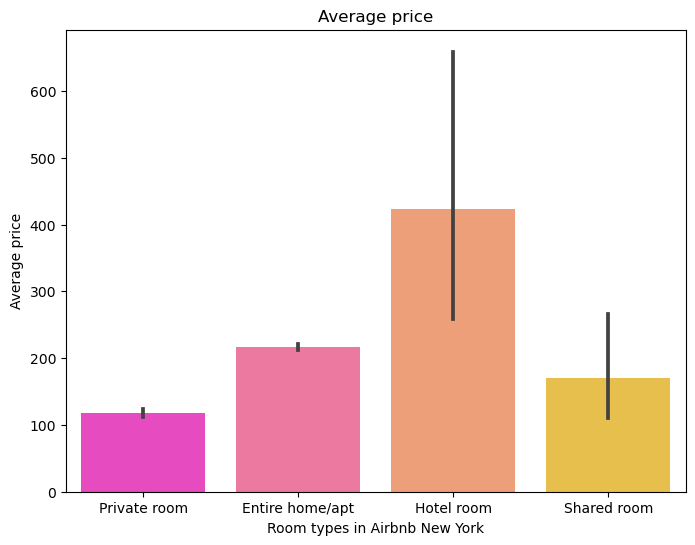

In [95]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='room_type', y='price', palette='spring')
plt.title('Average price')
plt.xlabel('Room types in Airbnb New York')
plt.ylabel('Average price')
plt.show()

#### _As we can see from the graph above , **Airbnb hotel room** is the most expensive Airbnb property in New York._

#### _**After we checked which Airbnb property is the most expensive in New York, we chose to check the average price of each property in every district in New York.**_

In [96]:
average_tip_by_region = df.groupby('neighbourhood_group')['price'].mean().reset_index()

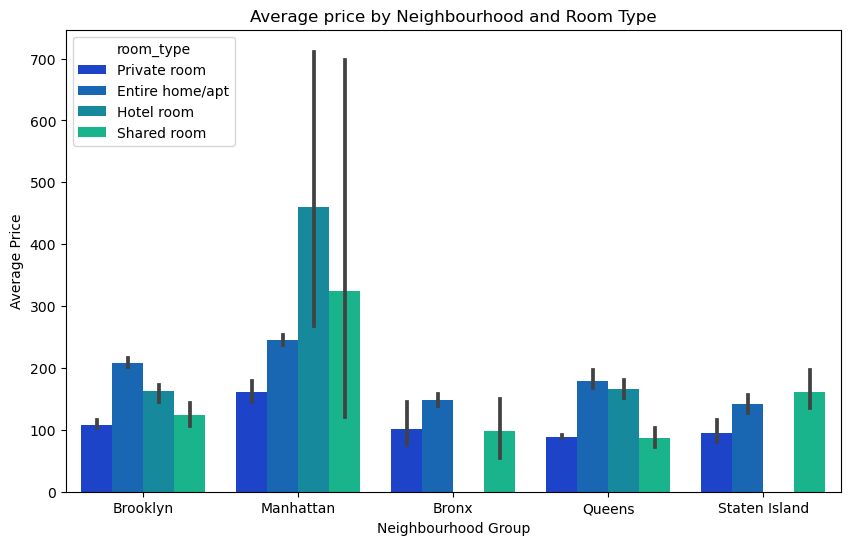

In [97]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='neighbourhood_group', y='price', hue='room_type', palette='winter')
plt.title('Average price by Neighbourhood and Room Type')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')
plt.show()

#### _As we can see in the graph above, we can understand that only in Manhattan the hotel room average price is the highest. Moreover, we can see that in Bronx and Staten Island, there are no Airbnb hotel rooms at all._
#### _In addition , we can notice that Manhattan's properties average prices are higher than all other districts._

#### _**We focused on the price vs the calculated host listnings count in Manhattan (because this district is the most expansive in New York).**_
#### _**We chose to check if there is a connection between both factors.**_



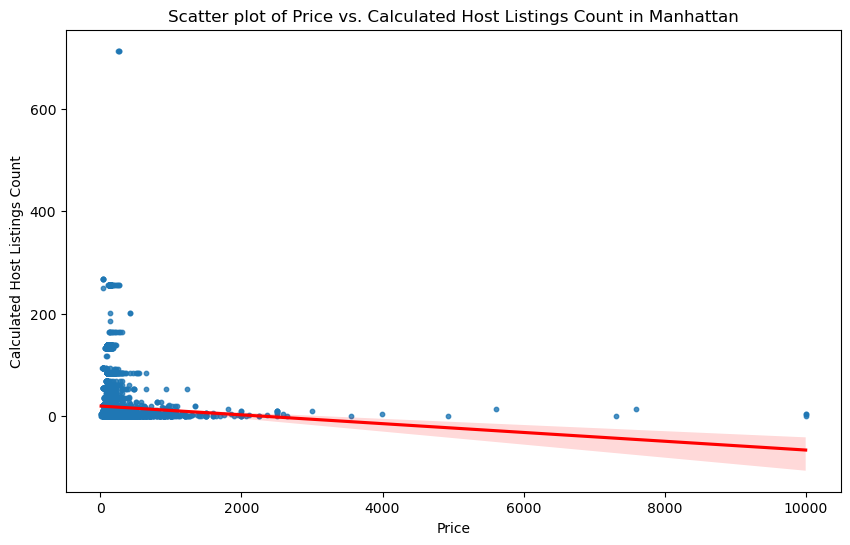

In [98]:
manhattan_filter = df['neighbourhood_group'] == 'Manhattan'
plt.figure(figsize=(10, 6))
sns.regplot(data=df[manhattan_filter], x='price', y='calculated_host_listings_count', scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Scatter plot of Price vs. Calculated Host Listings Count in Manhattan')
plt.xlabel('Price')
plt.ylabel('Calculated Host Listings Count')
plt.show()

#### _**We can clearly see from this graph that there is a connection. The cheaper the price, the bigger the number of orders.**_

#### _**Then, we wanted to check which district has the highest median order quantity in purpose to reach our conclusion.**_

In [99]:
df_median_orders = df.groupby(["neighbourhood_group"])["calculated_host_listings_count"].mean().reset_index()
fig = px.bar(df_median_orders, x='neighbourhood_group', y='calculated_host_listings_count', color='calculated_host_listings_count',
              title='Comparison of Host Listings Count between neighbourhoods in New York',
             labels={'calculated_host_listings_count': 'Calculated Host Listings Count', 'neighbourhood_group': 'Neighbourhood Group'}, height=400)
fig.show()

In [100]:
df_median_orders

,neighbourhood_group,calculated_host_listings_count
0,Bronx,3.226880
1,Brooklyn,3.780653
2,Manhattan,17.545352
3,Queens,9.168690
4,Staten Island,2.509653


## _**First insight:**_
#### _**We can see that although Manhattan is the most expensive district in New York, the amount of bookings there is the largest, especially the Airbnb property of a hotel room. Which also shows that although people order more when the price is cheaper, they choose it in the most expensive area.**_


## _**Second research:**_

#### _**We chose to check which neighborhood has the largest amount of Airbnb orders by using the latitude and the longitude from our data.**_

In [101]:
grid_df = df[["latitude", "longitude","calculated_host_listings_count"]]

In [102]:
fig = px.density_mapbox(grid_df, lat = 'latitude', lon = 'longitude', z = 'calculated_host_listings_count',
                        radius = 10,
                        center = dict(lat = 40.730610, lon = -73.935242),
                        zoom = 11,
                        mapbox_style = 'open-street-map')
fig.show()

#### _**From the GeoHeatMap above, we can infer some interesting information.**_
#### _**There are few properties in the Central Park area in Manhatten, probably because it is an expansive area to live in.**_
#### _**Moreover, we can see that our data is a correct data because there are Airbnb buildings in habitable areas (there are no buildings in the river).**_



##### _We can zoom in and zoom out the map to see the Airbnb buildings density and to see where they are located on map._


In [103]:
np.arange(0, 5.1, 0.5)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [104]:
bins = np.arange(0, 5.1, 0.5)
df_neighborhoods = (df.groupby([df['neighbourhood'], pd.cut(df['rating'], bins=bins)])
      .agg({"price":np.mean}).round(1)
      .unstack(fill_value=0)).fillna(0)

In [105]:
df_neighborhoods

price                                              \
rating          (0.0, 0.5] (0.5, 1.0] (1.0, 1.5] (1.5, 2.0] (2.0, 2.5]   
neighbourhood                                                            
Allerton               0.0        0.0        0.0        0.0        0.0   
Arden Heights          0.0        0.0        0.0        0.0        0.0   
Arrochar               0.0        0.0        0.0        0.0        0.0   
Arverne                0.0        0.0        0.0        0.0        0.0   
Astoria                0.0        0.0        0.0        0.0        0.0   
...                    ...        ...        ...        ...        ...   
Windsor Terrace        0.0        0.0        0.0        0.0        0.0   
Woodhaven              0.0        0.0        0.0        0.0        0.0   
Woodlawn               0.0        0.0        0.0        0.0        0.0   
Woodrow                0.0        0.0        0.0        0.0        0.0   
Woodside               0.0        0.0        0.0        0.0        0.0   

                                                                        
rating          (2.5, 3.0] (3.0, 3.5] (3.5, 4.0] (4.0, 4.5] (4.5, 5.0]  
neighbourhood                                                           
Allerton               0.0        0.0        0.0       58.3      110.1  
Arden Heights          0.0        0.0        0.0        0.0      133.8  
Arrochar               0.0        0.0        0.0        0.0      136.6  
Arverne                0.0        0.0      130.0      195.0      221.4  
Astoria                0.0        0.0       79.6      115.8      113.7  
...                    ...        ...        ...        ...        ...  
Windsor Terrace        0.0        0.0        0.0      117.7      161.5  
Woodhaven              0.0        0.0      119.0      102.0       91.8  
Woodlawn               0.0      155.0        0.0        0.0      155.8  
Woodrow                0.0        0.0        0.0        0.0       82.5  
Woodside              29.0       72.7       50.0       57.6       91.4  

[219 rows x 10 columns]

#### _**As we can see in this chart, there are information about the average cost per night in each neighborhood, all New York's neighborhoods and the ratings according the average price (in dollars).**_

<AxesSubplot:xlabel='None-rating', ylabel='neighbourhood'>

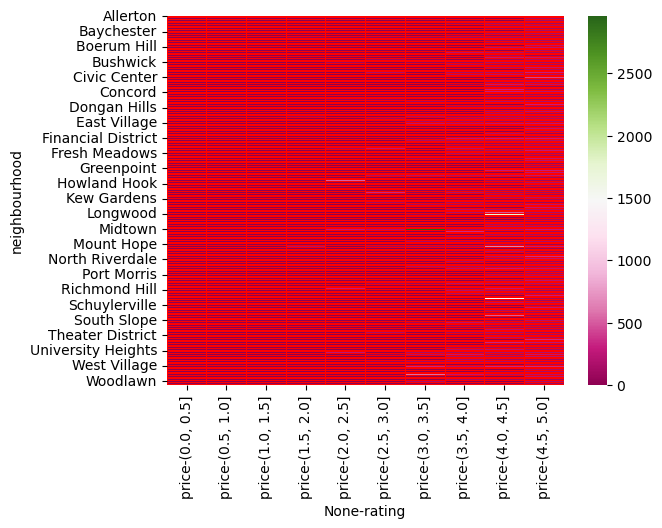

In [106]:
sns.heatmap(df_neighborhoods, linewidths=0.5, linecolor='red',cmap ="PiYG")

#### _**From the heat map above , it is a little bit difficult to understand and to see the results.**_

#### _**As a result, we filtered the results and narrowed down to the ten neighborhoods with the highest amount of orders and created a comparison between the amount of orders and the average rating.**_####

In [107]:
INTERESTING_NEIGHBORHOODS = df.groupby(['neighbourhood']).size().sort_values(ascending=False)[:10].index

In [108]:
bins = np.arange(0, 5.1, 0.5)
df_neighborhoods = (df.groupby([df['neighbourhood'], pd.cut(df['rating'], bins=bins)])
      .agg({"price":np.mean}).loc[INTERESTING_NEIGHBORHOODS]
                    .round(1)
      .unstack(fill_value=0)).fillna(0)

<AxesSubplot:xlabel='None-rating', ylabel='neighbourhood'>

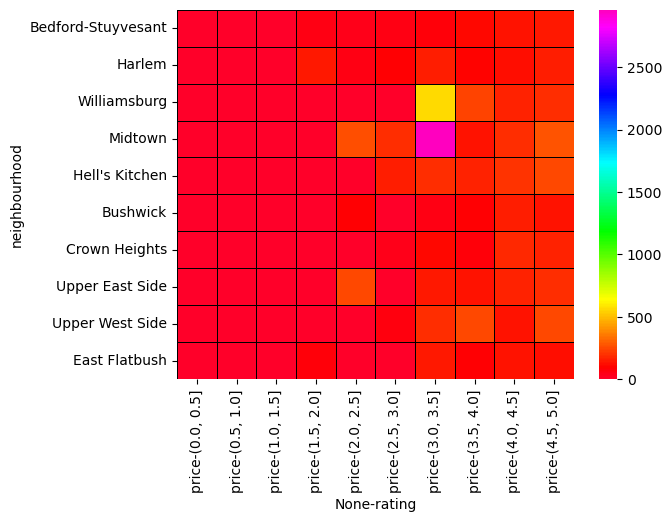

In [109]:
sns.heatmap(df_neighborhoods, linewidths=0.5, linecolor='black',cmap ='gist_rainbow')

## _**Second insight:**_

#### _**As we can infer and see from the graphs above, Midtown is the most expensive neighborhood in New York (located in Manhattan) for the avarage rating 3-3.5.After Midtown we see that Williamsburg ( located in Brooklyn) is cheaper with the same average rating. It means that the rating will not necessarily be very high if the neighborhood is expensive. Just because we will pay more, doesn't mean that we will get the best property**_

## _**Third research:**_

#### _**Let's check the correlations:**_



C:\Users\Owner\AppData\Local\Temp\ipykernel_6972\2109089082.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



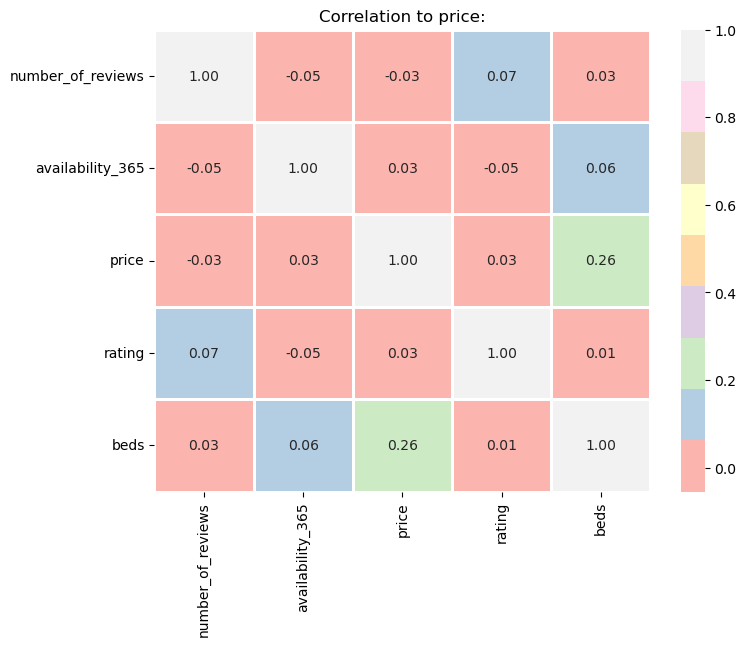

In [111]:
selected_columns = ['number_of_reviews', 'availability_365','price','rating', 'beds']
data_subset = df[selected_columns]
data_subset.dropna(inplace=True)
correlation = data_subset.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='Pastel1', fmt=".2f", linewidths=1)
plt.title('Correlation to price:')
plt.show()

#### _**As we can see from the correlation , the highest result is the correlation between the Airbnb price and the number of the beds.**_



#### _**It is possible that the reason for this is that the number of beds affects the size of the property and therefore the costs are higher.**_

#### _**When there are more beds, the property can accommodate more people and thus rent at a higher price because the price is divided between all the guests.**_

## _**Third insight:**_

#### _**If it possible to accommodate more beds in the Airbnb property, the option should be considered because the more beds there are in the property, the more expensive the property is. Although, the price will be cheaper for groups.**_